In [1]:
# import libraries
import os
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

/var/folders/9z/v2g_zsyn4m11dzc06c73_bbm0000gn/T/ipykernel_67252/2548364923.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# data preparation:
Data structure: from funda.nl, I scraped (using funda-scraper) houses listed for sale currently and ones being sold in 2023 (the ones available on the website record) for 8 cities (Amsterdam, Rotterdam, Almere, Utrecht, Nijmegen, Eindhoven, Masstricht, Leeuwarden). 
1. read csv files of each cities
2. combine data from current market and 2023 market to generate one file for each city
3. drop duplicated house based on house_id, for each city 
4. combine all data from 8 cities in one file

In [157]:
# get the file name of all csv files
file_name = os.listdir('Final_project_data/clean_data/')
for file in file_name:
    df = pd.read_csv('Final_project_data/clean_data/'+file)
    if '23' in file:
        df['on_market'] = 2023
    else:
        df['on_market'] = 2024
    df.to_csv('Final_project_data/clean_data/'+file, index=False)

In [2]:
# function to combine house data from 2023 and now for each city
def house_data_combine (city: str, data_folder: str)->pd.DataFrame:
    '''
    this function take the city name (str) and search in the data_folder to retrieve files containing information about house market of that city.
    Then read these csv files, and combine the dataframes to produce one final dataframe
    input:
    city: str
    data_folder: str
    output:
    pd.DataFrame
    '''
    file_name = os.listdir(data_folder)
    file_name_city = [file for file in file_name if city in file]
    total_files_city = len(file_name_city)
    n = 0
    df_final = pd.DataFrame()
    while n < total_files_city:
        df = pd.read_csv(data_folder+'{}'.format(file_name_city[n]))
        df_final = pd.concat([df_final, df], axis=0)
        n +=1
    return df_final 

In [3]:
ams = house_data_combine('ams', 'Final_project_data/clean_data/')
utrecht = house_data_combine('utrecht', 'Final_project_data/clean_data/')
eindhoven = house_data_combine('eindhoven', 'Final_project_data/clean_data/')
nijmegen = house_data_combine('nijmegen', 'Final_project_data/clean_data/')
rot = house_data_combine('rot', 'Final_project_data/clean_data/')
almere = house_data_combine('almere', 'Final_project_data/clean_data/')
maas = house_data_combine('maastricht', 'Final_project_data/clean_data/')
leeu = house_data_combine('leeuwarden', 'Final_project_data/clean_data/')

In [4]:
data = [ams, nijmegen, maas, eindhoven, rot, leeu, almere, utrecht]


In [5]:
#data = [ams, nijmegen, maas, eindhoven, rot, leeu, almere, utrecht]
cities = ['ams', 'nijmegen', 'maastricht', 'eindhoven', 'rot', 'leeuwarden', 'almere', 'utrecht']
total_records = 0
for city, df in zip(cities, data):
    print(f'shape of city {city} is: ', df.shape)
    total_records = total_records + df.shape[0]
display(total_records)


shape of city ams is:  (4386, 18)
shape of city nijmegen is:  (1936, 18)
shape of city maastricht is:  (1365, 18)
shape of city eindhoven is:  (2138, 18)
shape of city rot is:  (2993, 18)
shape of city leeuwarden is:  (1345, 18)
shape of city almere is:  (3241, 18)
shape of city utrecht is:  (2439, 18)


19843

In [6]:
# check duplicate
#data = [ams, nijmegen, maas, eindhoven, rot, leeu, almere, utrecht]
#cities = ['ams', 'nijmegen', 'maastricht', 'eindhoven', 'rot', 'leeuwarden', 'almere', 'utrecht']
for city, df in zip(cities, data):
    #print(f'shape of city {city} is: ', data.shape)
    print(f'Total duplication of city {city}: ', df.house_id.duplicated().sum())

Total duplication of city ams:  1
Total duplication of city nijmegen:  0
Total duplication of city maastricht:  0
Total duplication of city eindhoven:  1
Total duplication of city rot:  2
Total duplication of city leeuwarden:  0
Total duplication of city almere:  0
Total duplication of city utrecht:  0


In [7]:
# reset_index
#data = [ams, nijmegen, maas, eindhoven, rot, leeu, almere, utrecht]
index = [df.reset_index(inplace=True, drop=True) for df in data ]


In [8]:
# drop duplicates
#data = [ams, nijmegen, maas, eindhoven, rot, leeu, almere, utrecht]
data = [ df[~df.house_id.duplicated()] for df in data]



In [9]:
# check duplicate again after drop
#data = [ams, nijmegen, maas, eindhoven, rot, leeu, almere, utrecht]
#cities = ['ams', 'nijmegen', 'maastricht', 'eindhoven', 'rot', 'leeuwarden', 'almere', 'utrecht']
for city, df in zip(cities, data):
    #print(f'shape of city {city} is: ', data.shape)
    print(f'Total duplication of city {city}: ', df.house_id.duplicated().sum())

Total duplication of city ams:  0
Total duplication of city nijmegen:  0
Total duplication of city maastricht:  0
Total duplication of city eindhoven:  0
Total duplication of city rot:  0
Total duplication of city leeuwarden:  0
Total duplication of city almere:  0
Total duplication of city utrecht:  0


In [10]:
# reset_index after drop duplicates
#data = [ams, nijmegen, maas, eindhoven, rot, leeu, almere, utrecht]
index = [ df.reset_index(inplace=True, drop=True) for df in data ]

In [15]:
#data = [ams, nijmegen, maas, eindhoven, rot, leeu, almere, utrecht]
cities = ['ams', 'nijmegen', 'maastricht', 'eindhoven', 'rot', 'leeuwarden', 'almere', 'utrecht']
total_records = 0
total_zip = 0
for city, df in zip(cities, data):
    print(f'shape of city {city} is: ', df.shape)
    print(f'number of zip code of {city} is: ', df.zip.nunique())
    total_records = total_records + df.shape[0]
    total_zip = total_zip + df.zip.nunique()
display(total_records)
display(total_zip)

shape of city ams is:  (4385, 18)
number of zip code of ams is:  74
shape of city nijmegen is:  (1936, 18)
number of zip code of nijmegen is:  22
shape of city maastricht is:  (1365, 18)
number of zip code of maastricht is:  18
shape of city eindhoven is:  (2137, 18)
number of zip code of eindhoven is:  31
shape of city rot is:  (2991, 18)
number of zip code of rot is:  62
shape of city leeuwarden is:  (1345, 18)
number of zip code of leeuwarden is:  25
shape of city almere is:  (3241, 18)
number of zip code of almere is:  38
shape of city utrecht is:  (2439, 18)
number of zip code of utrecht is:  40


19839

310

In [ ]:
ams.to_csv('Final_project_data/clean_data/ams.csv', index=False)
utrecht.to_csv('Final_project_data/clean_data/utrecht.csv', index=False)
eindhoven.to_csv('Final_project_data/clean_data/eindhoven.csv', index=False)
nijmegen.to_csv('Final_project_data/clean_data/nijmegen.csv', index=False)
rot.to_csv('Final_project_data/clean_data/rotterdam.csv', index=False)
almere.to_csv('Final_project_data/clean_data/almere.csv', index=False)
maas.to_csv('Final_project_data/clean_data/maastricht.csv', index=False)
leeu.to_csv('Final_project_data/clean_data/leeuwarden.csv', index=False)

In [13]:
# combine data from all cities
df_all = pd.concat(data, axis=0)
df_all.shape

(19839, 18)

In [14]:
df_all.zip.nunique()

310

In [18]:
df_all.describe()

,house_id,price,price_m2,room,bedroom,bathroom,living_area,zip,year_built,house_age,on_market
count,1.983900e+04,1.983900e+04,19839.000000,19839.000000,19839.000000,19839.000000,19839.000000,19839.000000,19839.000000,19839.000000,19839.000000
mean,4.238063e+07,5.106296e+05,4948.062922,4.121629,2.759766,0.983164,106.693432,3625.656888,1936.825042,87.174958,2023.411563
std,3.577803e+05,3.958089e+05,2068.644561,1.714199,1.352058,0.532556,52.109583,2446.043243,264.883143,264.883143,0.492129
min,4.130783e+07,9.750000e+02,10.900000,1.000000,0.000000,0.000000,11.000000,1011.000000,0.000000,-8.000000,2023.000000
25%,4.219475e+07,3.250000e+05,3515.600000,3.000000,2.000000,1.000000,72.000000,1319.000000,1936.000000,17.000000,2023.000000
50%,4.229153e+07,4.250000e+05,4420.500000,4.000000,3.000000,1.000000,98.000000,3072.000000,1981.000000,43.000000,2023.000000
75%,4.236872e+07,5.750000e+05,5816.950000,5.000000,4.000000,1.000000,130.000000,5653.000000,2007.000000,88.000000,2024.000000
max,4.346994e+07,1.250000e+07,25201.600000,25.000000,20.000000,9.000000,773.000000,8941.000000,2032.000000,2024.000000,2024.000000


In [281]:
# save the combined data frame as house_market.csv
df_all.to_csv('Final_project_data/1_house_market.csv', index=False)

# data cleaning

1. drop unneccessary cols: 'house_id', 'descrip', 'photo', 'zip', 'adress', 'year_built'


In [20]:
# drop columns: house_id, descrip, photo, year_built, zip, address from the combined df
df_all.head()
df_all_drop =  df_all.drop(columns = ['house_id', 'descrip', 'photo', 'year_built', 'zip', 'address']).reset_index(drop=True )

In [21]:
# drop columns: house_id, descrip, photo, year_built, zip, address from the combined df
df_all.head()
df_all_drop_2 =  df_all.drop(columns = ['house_id', 'descrip', 'photo', 'house_age', 'zip', 'address']).reset_index(drop=True )

In [22]:
df_all_drop_2[df_all_drop_2.year_built==0]

,city,house_type,building_type,price,price_m2,room,bedroom,bathroom,living_area,energy_label,year_built,on_market
16,amsterdam,appartement,Nieuwbouw,1119000,6048.6,4,3,2,185,A,0,2024
30,amsterdam,appartement,Bestaande bouw,400000,8695.7,2,1,1,46,D,0,2024
82,amsterdam,appartement,Bestaande bouw,1775000,8492.8,5,4,1,209,C,0,2024
93,amsterdam,appartement,Nieuwbouw,940000,10329.7,3,2,1,91,>A+,0,2024
95,amsterdam,appartement,Bestaande bouw,1250000,7622.0,6,3,0,164,na,0,2024
...,...,...,...,...,...,...,...,...,...,...,...,...
19518,utrecht,huis,Bestaande bouw,287500,7565.8,2,1,1,38,G,0,2023
19528,utrecht,appartement,Bestaande bouw,340000,5862.1,3,1,1,58,D,0,2023
19654,utrecht,appartement,Bestaande bouw,485000,6381.6,2,1,1,76,A,0,2023
19676,utrecht,appartement,Bestaande bouw,895000,6215.3,4,3,1,144,C,0,2023


In [283]:
# save the dropped df as house_market_drop.csv
df_all_drop_2.to_csv('Final_project_data/3_house_market_year_built.csv')

In [282]:
# save the dropped df as house_market_drop.csv
df_all_drop.to_csv('Final_project_data/2_house_market_house_age.csv')

In [23]:
# checking value counts of all columns for df_all_drop
for col in df_all_drop.columns:
    print(df_all_drop[col].value_counts(dropna=False))
    print()

city
amsterdam     4385
almere        3241
rotterdam     2991
utrecht       2439
eindhoven     2137
nijmegen      1936
maastricht    1365
leeuwarden    1345
Name: count, dtype: int64

house_type
appartement    10716
huis            9123
Name: count, dtype: int64

building_type
Bestaande bouw    16906
Nieuwbouw          2933
Name: count, dtype: int64

price
375000     565
325000     548
425000     524
350000     517
450000     517
          ... 
519800       1
6250000      1
442000       1
428840       1
279950       1
Name: count, Length: 1377, dtype: int64

price_m2
5000.0    166
4166.7    102
5071.4     87
3571.4     79
8333.3     70
         ... 
3451.9      1
4774.4      1
2373.0      1
2567.3      1
6792.5      1
Name: count, Length: 8792, dtype: int64

room
3     5340
4     4347
5     4067
2     2468
6     1893
7      736
1      321
8      316
9      137
10      83
11      44
12      37
13      20
14      14
16       6
15       4
19       2
25       2
23       1
17       1
Name: 

In [24]:
# function for distribution plots:
def dist_plot(df:pd.DataFrame):
	num = df.select_dtypes(np.number)
	row = int(np.ceil(len(df.columns)/2))
	fig, ax =plt.subplots(row, 2, figsize = (15,20))
	ax = ax.flatten()
	for i, col in enumerate(df.columns):
		sns.histplot(df[col], legend=col, ax = ax[i])
	plt.tight_layout()
	plt.show()


# function for boxplots:
def boxplot(df:pd.DataFrame):
	num = df.select_dtypes(np.number)
	row = int(np.ceil(len(df.columns)/2))
	fig, ax =plt.subplots(row, 2, figsize = (15,20))
	ax = ax.flatten()
	for i, col in enumerate(df.columns):
		sns.boxplot(df[col], ax = ax[i])
	plt.tight_layout()
	plt.show()


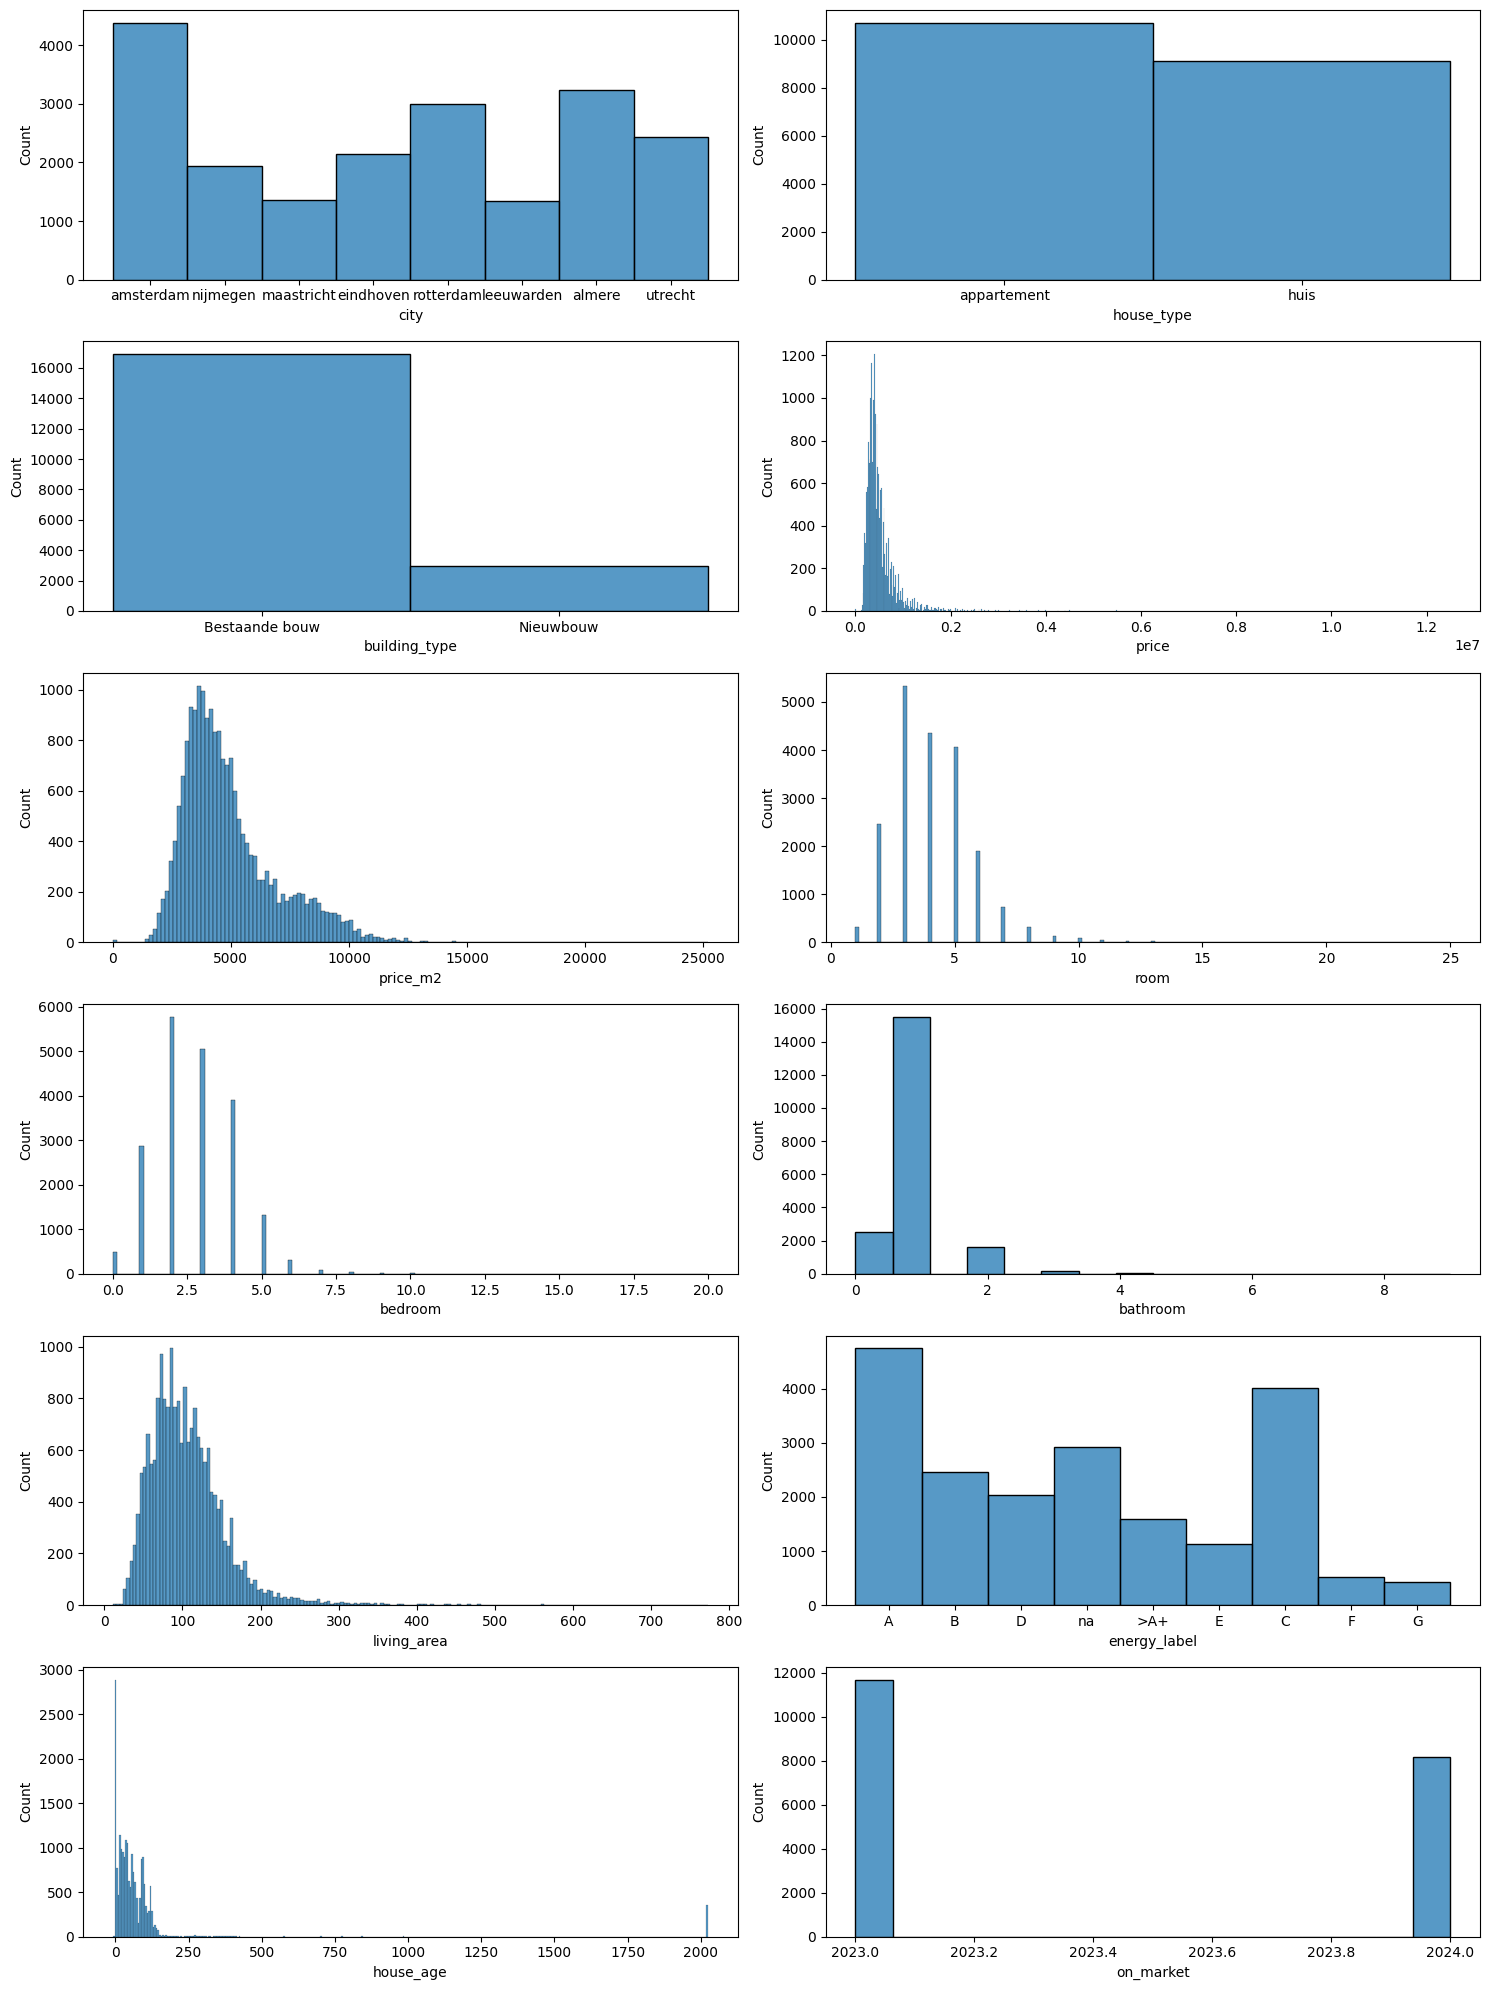

In [25]:
dist_plot(df_all_drop)

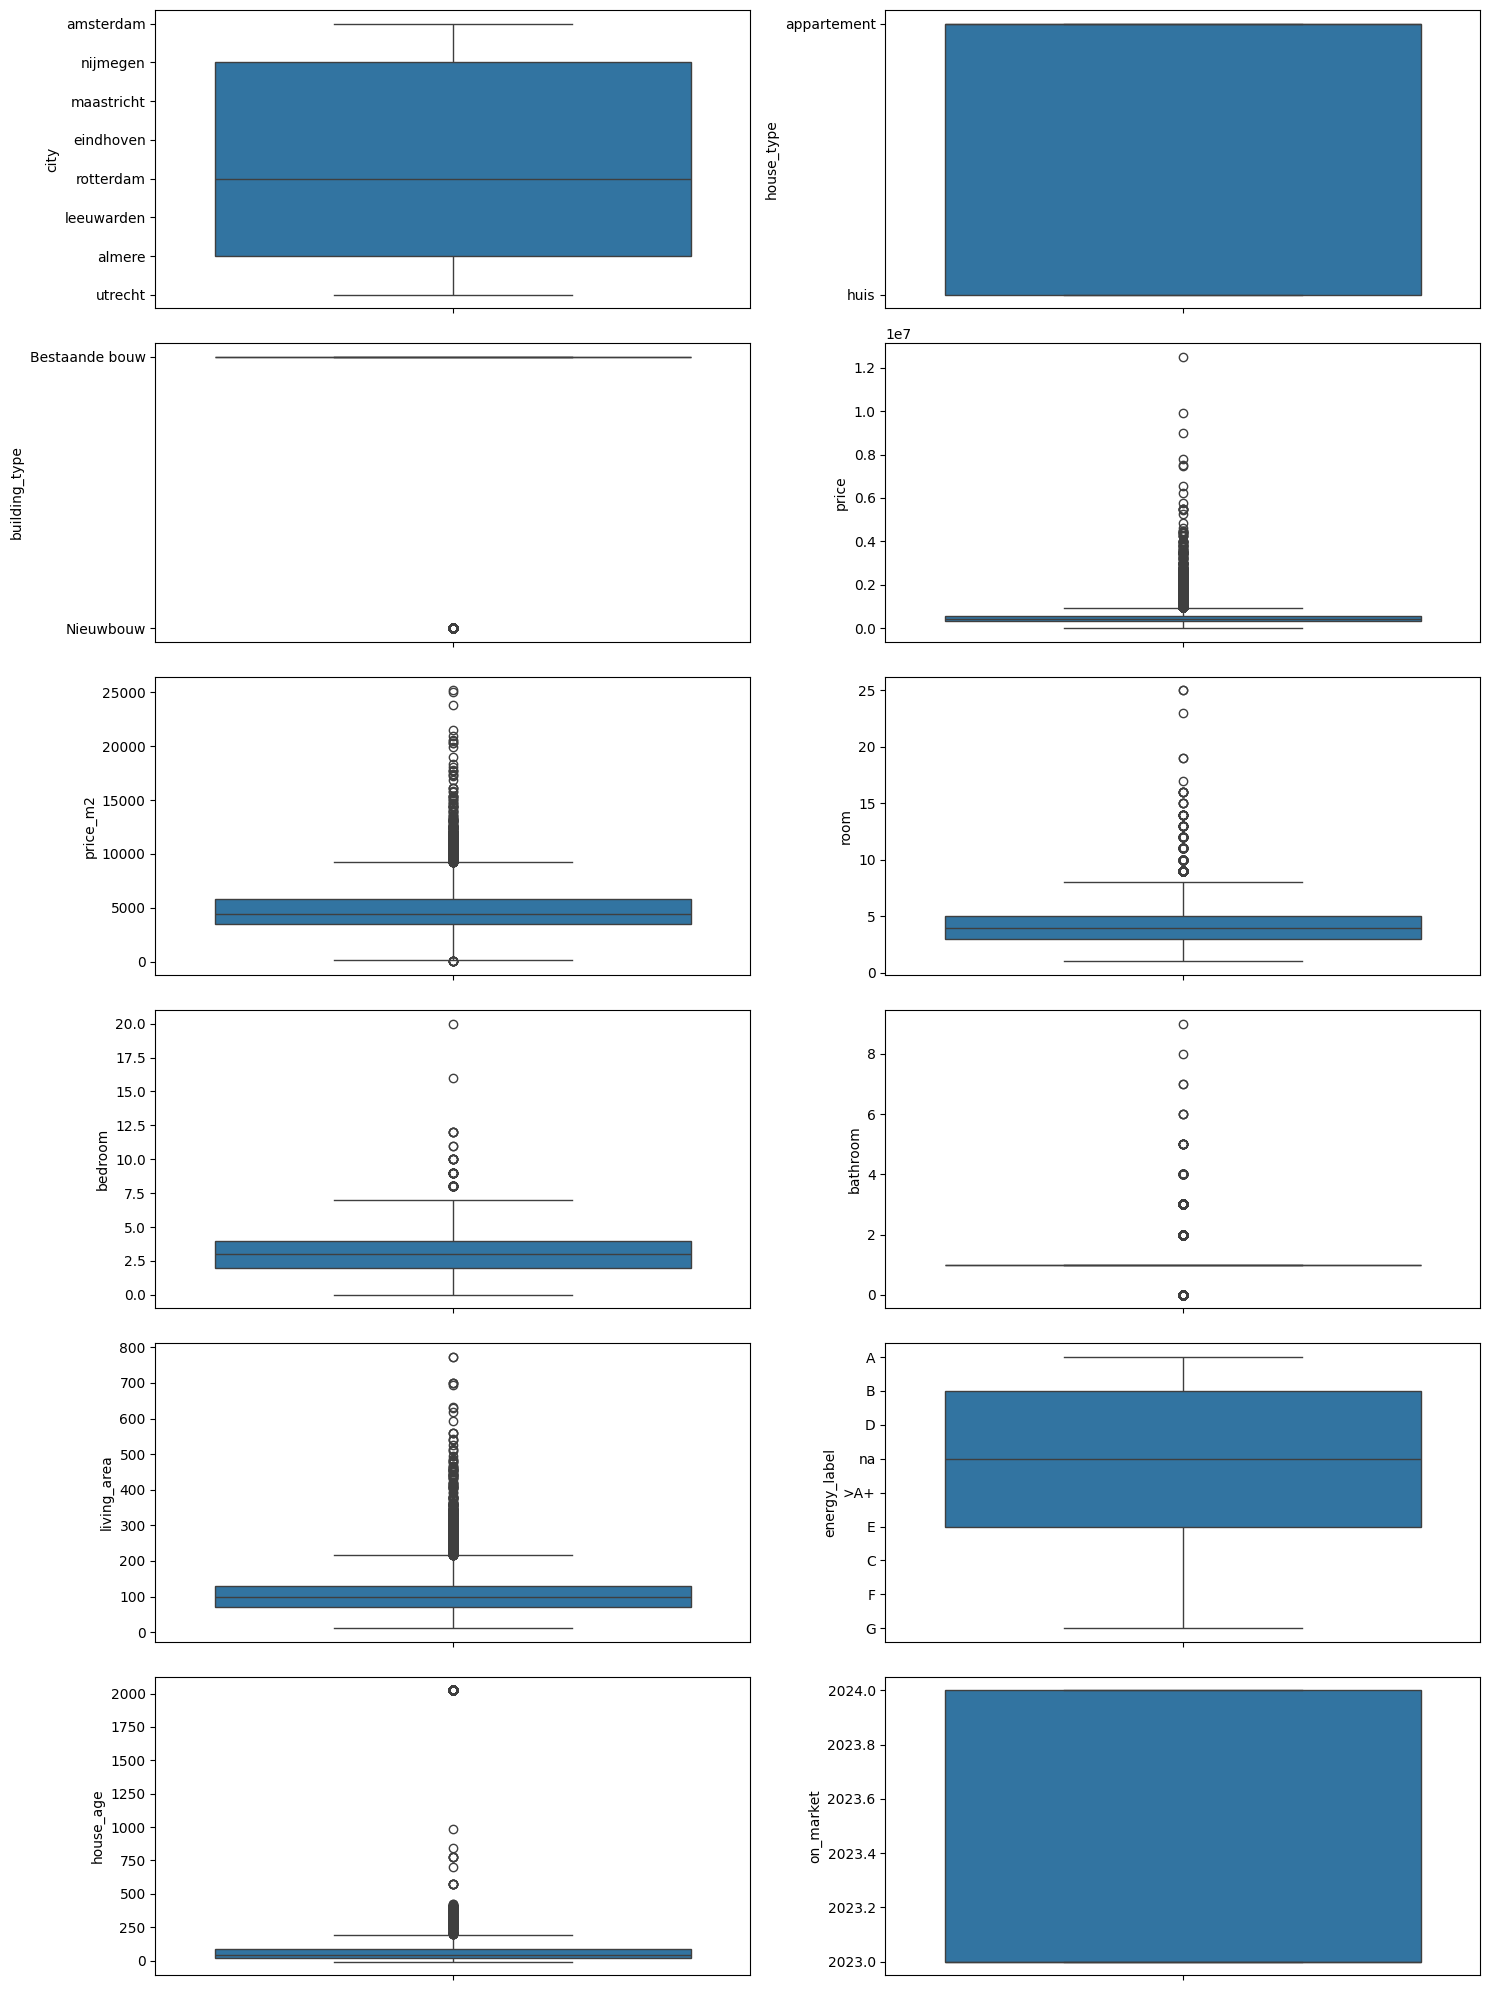

In [26]:
boxplot(df_all_drop)

In [27]:
df_all_drop.energy_label.value_counts(dropna=False)

energy_label
A      4742
C      4014
na     2914
B      2468
D      2029
>A+    1593
E      1135
F       525
G       419
Name: count, dtype: int64

In [28]:
# encode ordinal categorical energy_label: >A+ > A > B > C > D > E > F > G > na (missing info equal 0)

df_all_drop['energy_label'] = df_all_drop['energy_label'].apply(lambda x: 1 if x == 'G' else 
                                                                                        ( 2 if x == 'F' 
                                                                                        else ( 3 if x == 'E' 
                                                                                        else (4 if x == 'D' 
                                                                                        else (5 if x == 'C' 
                                                                                        else (6 if x == 'B'
                                                                                        else (7 if x == 'A'
                                                                                        else (8 if x == '>A+' 
                                                                                        else 0 ) )))))))
df_all_drop.energy_label.value_counts(dropna=False)

energy_label
7    4742
5    4014
0    2914
6    2468
4    2029
8    1593
3    1135
2     525
1     419
Name: count, dtype: int64

In [29]:
df_all_drop.city.value_counts()

city
amsterdam     4385
almere        3241
rotterdam     2991
utrecht       2439
eindhoven     2137
nijmegen      1936
maastricht    1365
leeuwarden    1345
Name: count, dtype: int64

In [30]:
avg_price = pd.read_excel('Final_project_data/Existing_own_homes__purchase_price_indices_by_region_2015_100_25012024_113157.xls')
avg_price

,Existing own homes; purchase price indices by region 2015=100,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,Periods: 2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Topic,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Price index of existing own homes|Price index ...,Average purchase price,NaN,NaN,NaN,NaN,NaN
3,Regions,2015=100,euro,NaN,NaN,NaN,NaN,NaN
4,Groningen (PV),185.8,313679,gro,12.0,NaN,NaN,NaN
5,Fryslân (PV),177.3,323765,leeu,11.0,NaN,leeu,323765.0
6,Drenthe (PV),178.7,349757,NaN,8.0,NaN,NaN,NaN
7,Overijssel (PV),176.5,365733,zwolle,7.0,NaN,NaN,NaN
8,Flevoland (PV),201.3,394736,almere,6.0,NaN,almere,394736.0
9,Gelderland (PV),181.2,413316,nijmegen,4.0,NaN,nijmegen,413316.0


In [212]:
avg_price.drop(columns=[ 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5'], inplace=True)
avg_price.drop(index=[0,1,2,3,4, 6,7, 13, 16], inplace=True)
avg_price.reset_index(drop=True, inplace=True)
avg_price.columns = ['Provincie', 'city', 'Average_purchase_price_2023']

# base on the avg_price table, I calculate the average_value_distance = the highest (APP2023 - the lowest APP2023)/number of gaps (we have 8 cities -> 7 gaps)
average_value_distance  = (avg_price['Average_purchase_price_2023'].max() - avg_price['Average_purchase_price_2023'].min())/(len(avg_price['city'])-1)

# the lowest average_purchase_price_2023 in this group of 8 cities will be ranked as 1.00
# the highest average_purchase_price_2023 (APP2023) in this group of 8 cities will be ranked as 8.00
# base on the average_value_distance, we will calculate for the ranks of the cities having APP2023 in between the lowest APP and the highest APP, to correct for the price difference among provincies

avg_price['city_price_ratio'] = ((((avg_price['Average_purchase_price_2023']- avg_price['Average_purchase_price_2023'].min())/average_value_distance)*1)+1).round(2)

avg_price['city'] = avg_price['city'].apply(lambda x: 'leeuwarden' if x =='leeu' else
                                                                                ('utrecht' if x == 'u' else 
                                                                                ('amsterdam' if x == 'ams' else
                                                                                ('rotterdam' if x == 'rot' else 
                                                                                ('maastricht' if x == 'maas' else x )))))
avg_price

,Provincie,city,Average_purchase_price_2023,city_price_ratio
0,Fryslân (PV),leeuwarden,323765.0,1.00
1,Flevoland (PV),almere,394736.0,3.71
2,Gelderland (PV),nijmegen,413316.0,4.42
3,Utrecht (PV),utrecht,476555.0,6.83
4,Noord-Holland (PV),amsterdam,507271.0,8.00
5,Zuid-Holland (PV),rotterdam,410408.0,4.31
6,Noord-Brabant (PV),eindhoven,418547.0,4.62
7,Limburg (PV),maastricht,329001.0,1.20


In [33]:
#avg_price.to_csv('Final_project_data/city_price_ratio.csv')

avg_price = pd.read_csv('Final_project_data/city_price_ratio.csv')

In [34]:
house = pd.merge(df_all_drop,avg_price[['city', 'city_price_ratio']], left_on='city', right_on='city', how='left'  )

In [215]:
house.to_csv('Final_project_data/4_house.csv')

In [35]:
house.head()

,city,house_type,building_type,price,price_m2,room,bedroom,bathroom,living_area,energy_label,house_age,on_market,city_price_ratio
0,amsterdam,appartement,Bestaande bouw,525000,4952.8,4,3,1,106,7,18,2024,8.0
1,amsterdam,appartement,Bestaande bouw,725000,8146.1,3,2,1,89,6,45,2024,8.0
2,amsterdam,huis,Bestaande bouw,675000,5769.2,4,3,1,117,6,29,2024,8.0
3,amsterdam,appartement,Bestaande bouw,500000,7936.5,3,2,1,63,4,102,2024,8.0
4,amsterdam,appartement,Nieuwbouw,513000,6412.5,3,2,1,80,0,2,2024,8.0


In [36]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19839 entries, 0 to 19838
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   city              19839 non-null  object 
 1   house_type        19839 non-null  object 
 2   building_type     19839 non-null  object 
 3   price             19839 non-null  int64  
 4   price_m2          19839 non-null  float64
 5   room              19839 non-null  int64  
 6   bedroom           19839 non-null  int64  
 7   bathroom          19839 non-null  int64  
 8   living_area       19839 non-null  int64  
 9   energy_label      19839 non-null  int64  
 10  house_age         19839 non-null  int64  
 11  on_market         19839 non-null  int64  
 12  city_price_ratio  19839 non-null  float64
dtypes: float64(2), int64(8), object(3)
memory usage: 2.0+ MB


In [37]:
house.describe()

,price,price_m2,room,bedroom,bathroom,living_area,energy_label,house_age,on_market,city_price_ratio
count,1.983900e+04,19839.000000,19839.000000,19839.000000,19839.000000,19839.000000,19839.000000,19839.000000,19839.000000,19839.000000
mean,5.106296e+05,4948.062922,4.121629,2.759766,0.983164,106.693432,4.728363,87.174958,2023.411563,4.943130
std,3.958089e+05,2068.644561,1.714199,1.352058,0.532556,52.109583,2.511764,264.883143,0.492129,2.206414
min,9.750000e+02,10.900000,1.000000,0.000000,0.000000,11.000000,0.000000,-8.000000,2023.000000,1.000000
25%,3.250000e+05,3515.600000,3.000000,2.000000,1.000000,72.000000,3.000000,17.000000,2023.000000,3.710000
50%,4.250000e+05,4420.500000,4.000000,3.000000,1.000000,98.000000,5.000000,43.000000,2023.000000,4.420000
75%,5.750000e+05,5816.950000,5.000000,4.000000,1.000000,130.000000,7.000000,88.000000,2024.000000,6.830000
max,1.250000e+07,25201.600000,25.000000,20.000000,9.000000,773.000000,8.000000,2024.000000,2024.000000,8.000000


In [38]:
house_ft = house[house.price <8000000]

In [40]:
house_ft.describe()

,price,price_m2,room,bedroom,bathroom,living_area,energy_label,house_age,on_market,city_price_ratio
count,1.983600e+04,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000
mean,5.091239e+05,4945.416208,4.120690,2.759377,0.982960,106.638284,4.728221,87.179472,2023.411474,4.942667
std,3.759800e+05,2057.250892,1.712439,1.351740,0.531927,51.913375,2.511841,264.902413,0.492113,2.206261
min,9.750000e+02,10.900000,1.000000,0.000000,0.000000,11.000000,0.000000,-8.000000,2023.000000,1.000000
25%,3.250000e+05,3515.600000,3.000000,2.000000,1.000000,72.000000,3.000000,17.000000,2023.000000,3.710000
50%,4.250000e+05,4420.300000,4.000000,3.000000,1.000000,98.000000,5.000000,43.000000,2023.000000,4.420000
75%,5.750000e+05,5815.700000,5.000000,4.000000,1.000000,130.000000,7.000000,88.000000,2024.000000,6.830000
max,7.800000e+06,25000.000000,25.000000,20.000000,9.000000,773.000000,8.000000,2024.000000,2024.000000,8.000000


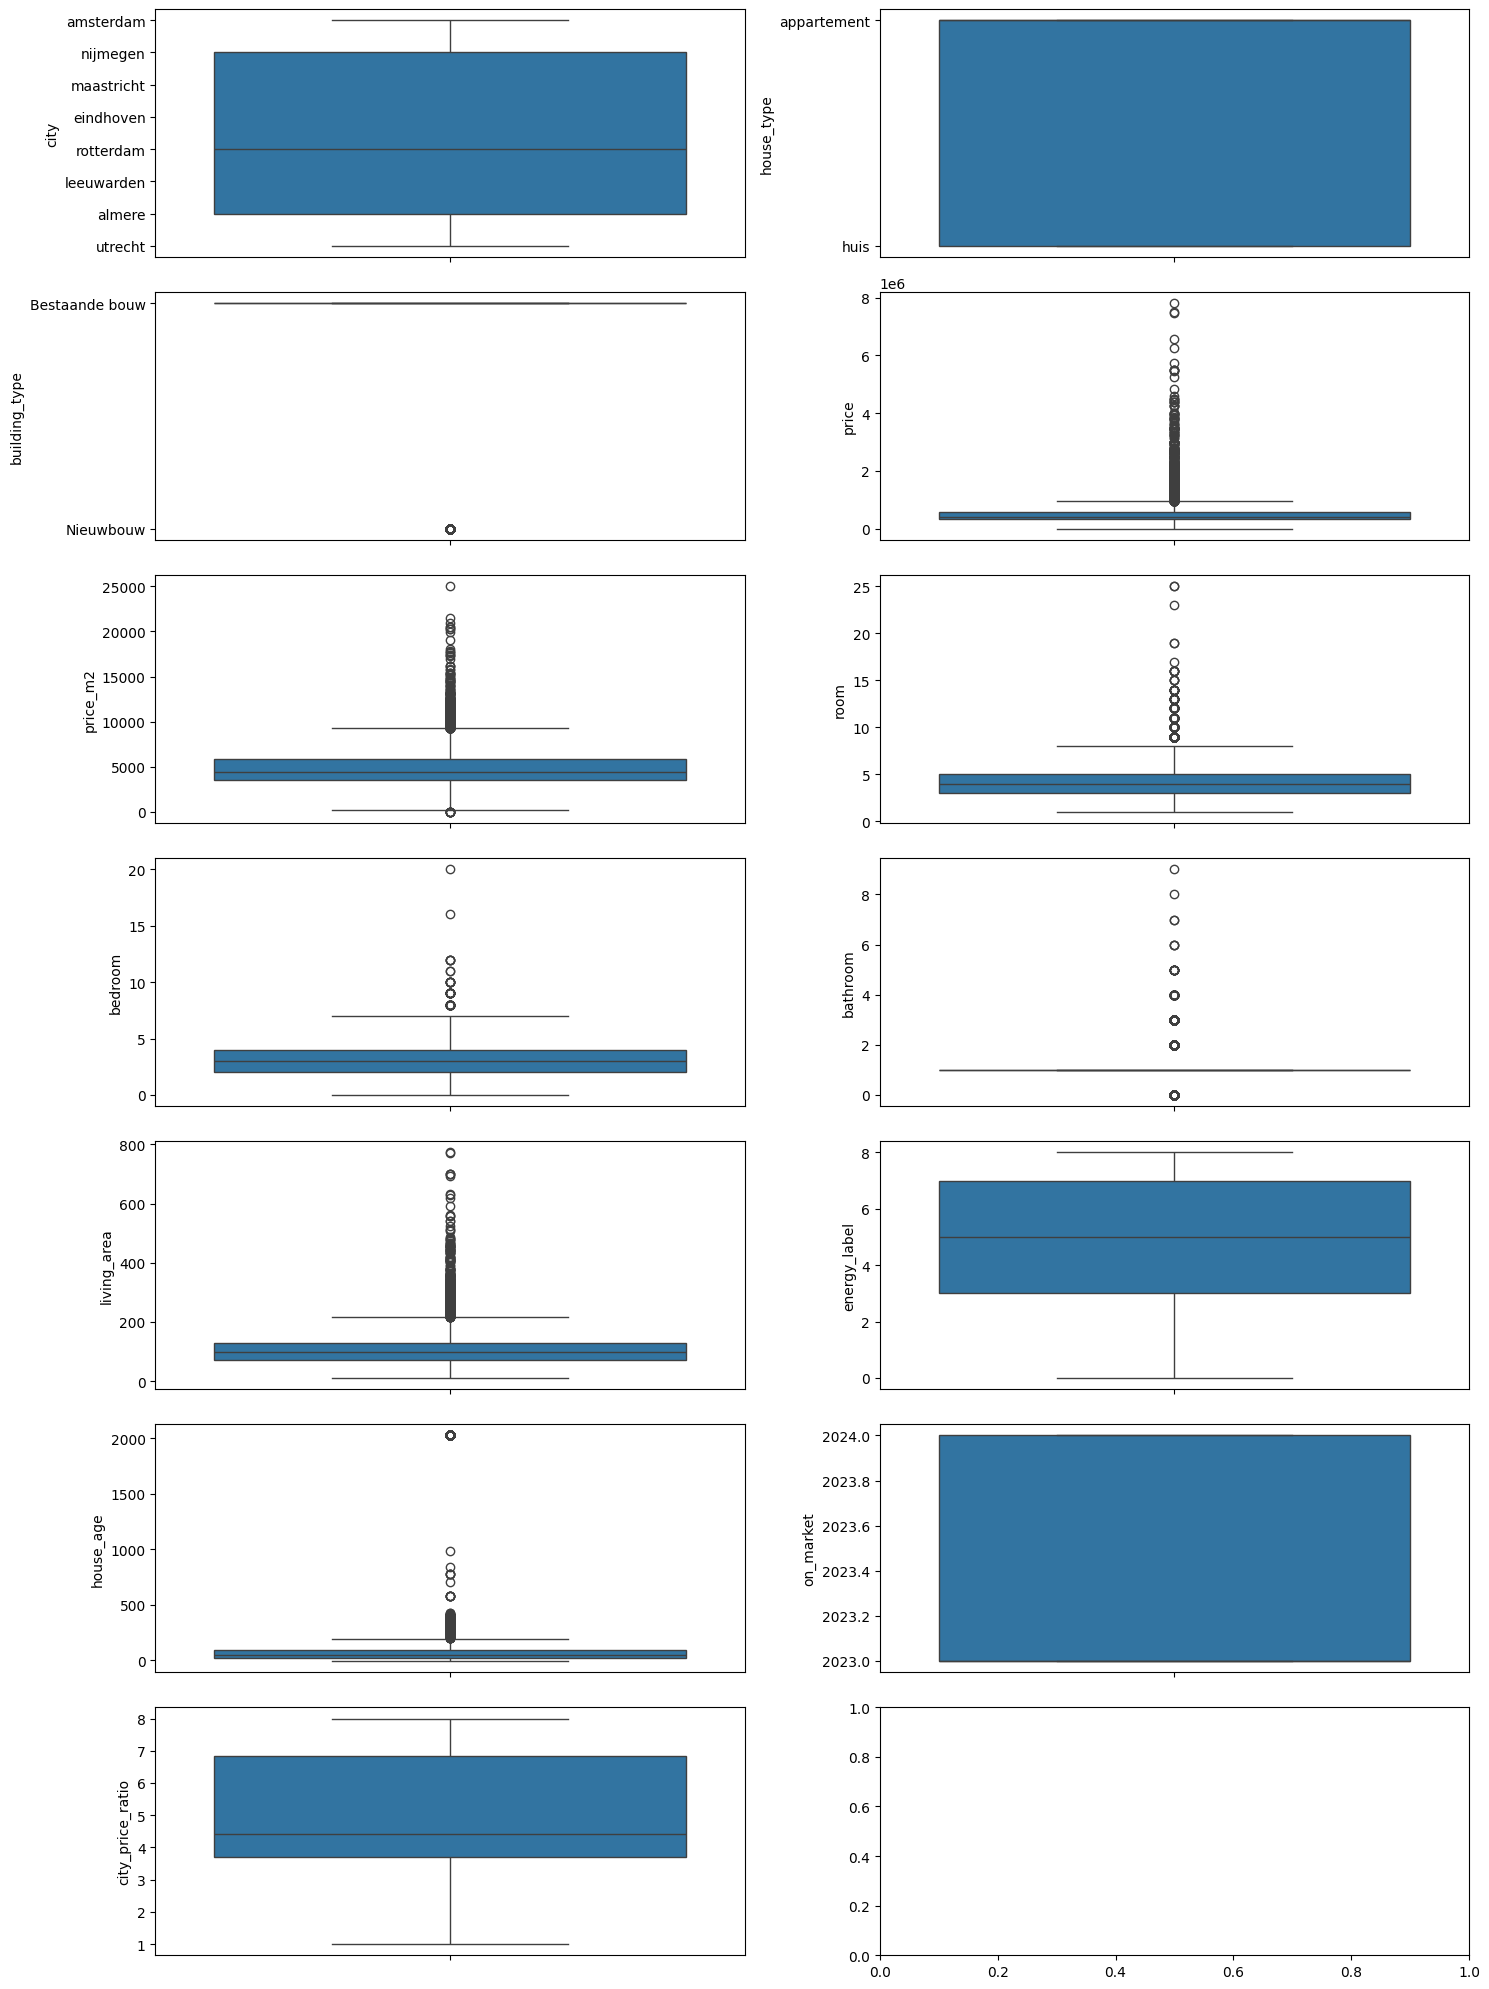

In [39]:
boxplot(house_ft)

In [232]:
def detect_outliers_zscore(df: pd.DataFrame, column: str, threshold: int=3) ->list:
    '''
    This function checks a column of a given Pandas DataFrame, computes the z-score
    of every value, and flags the value as "outlier" if it's values is outside the
    [-3,3] range.

    Input:
    df: Pandas DataFrame

    Output:
    Python list of indexes for values which are outliers.
    '''

    df2 = df.copy()
    outliers = []

    df2['abs-z-score'] = np.abs( ( df2[column] - df2[column].mean() ) / df2[column].std(ddof=1) ) # ddof is a type of correction

    outliers = df2[ df2['abs-z-score'] > threshold ].index.tolist()

    return outliers

In [234]:
house_age_outlier = detect_outliers_zscore(house, 'house_age', 3)

In [235]:
len(house_age_outlier)

353

In [244]:
house.bathroom.value_counts()

bathroom
1    15302
0     2393
2     1565
3      170
4       38
5       11
6        3
7        2
9        1
8        1
Name: count, dtype: int64

In [238]:
house.drop(house_age_outlier, axis=0, inplace=True)

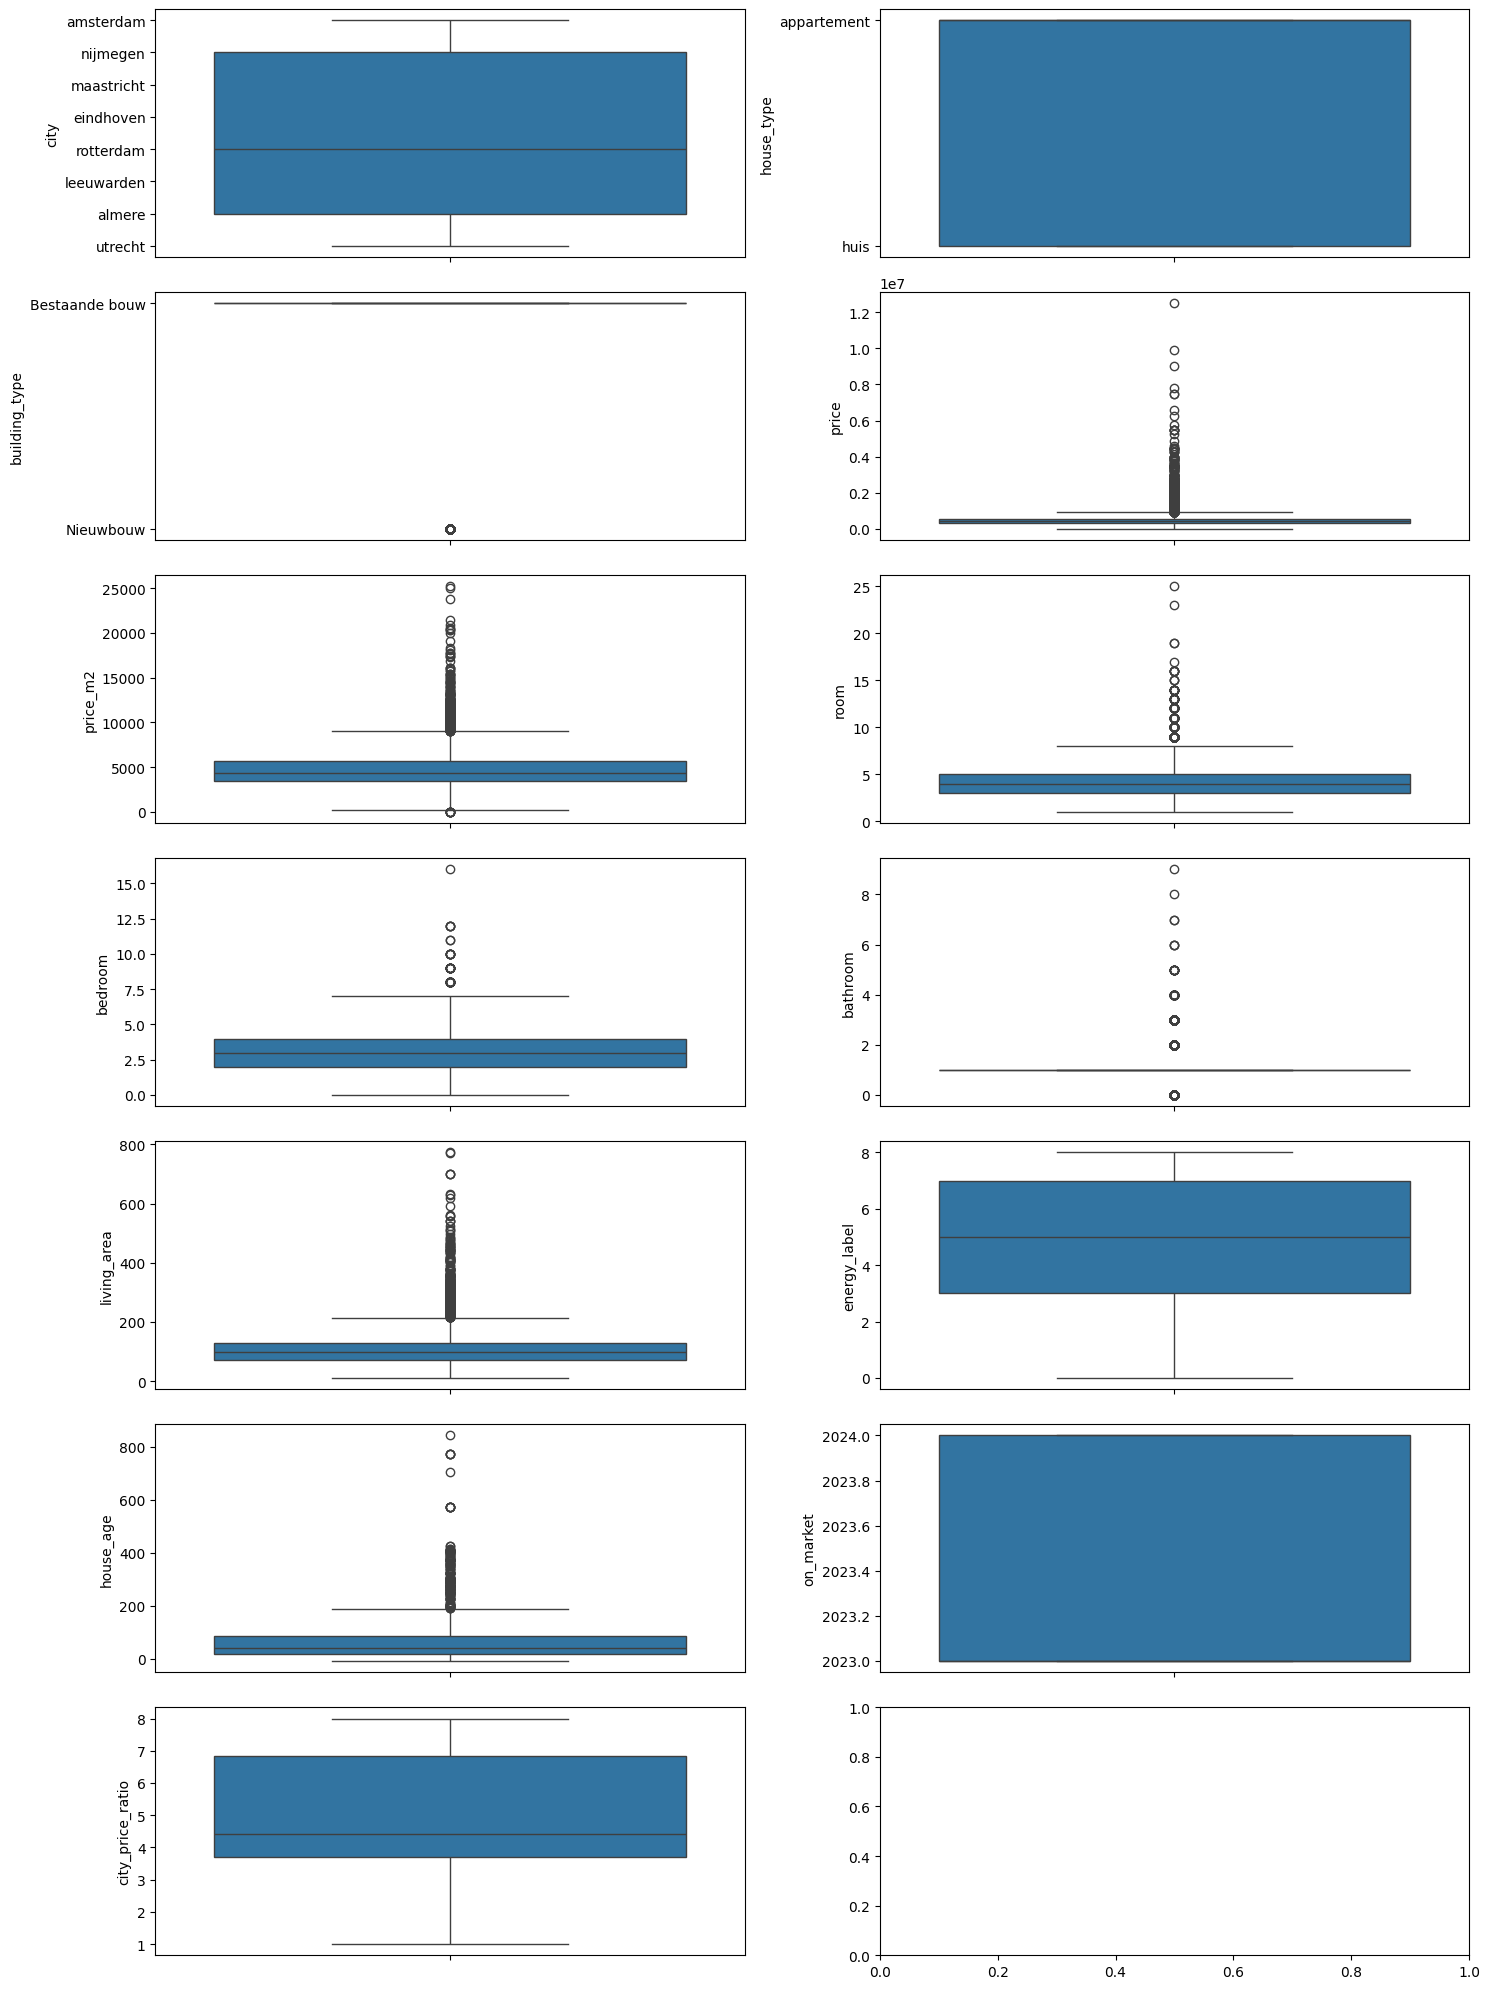

In [239]:
boxplot(house)

In [19]:
house.describe()

NameError: name 'house' is not defined

# X/y split

In [256]:
X = house.drop(['price', 'price_m2', 'on_market'], axis = 1)
y1 = house['price']
y2 = house['price_m2']

# train/test split

In [257]:
from sklearn.model_selection import train_test_split

X_train, X_test, y1_train, y1_test = train_test_split(X, y1, test_size = 0.3, random_state = 73)

# split numerical and categorical variables

In [258]:
# split cat and num variables for train and test sets
X_train_num = X_train.select_dtypes(np.number)
X_test_num = X_test.select_dtypes(np.number)


X_train_cat = X_train.select_dtypes(object)
X_test_cat = X_test.select_dtypes(object)

# encoding categorical variables
city, house_type, and building_type

In [259]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', handle_unknown = 'error')
encoder.fit(X_train_cat)

X_train_cat_encoded = encoder.transform(X_train_cat).toarray()
X_test_cat_encoded = encoder.transform(X_test_cat).toarray()

X_train_cat_encoded_df = pd.DataFrame(X_train_cat_encoded, columns = encoder.get_feature_names_out(), index = X_train_cat.index)
X_test_cat_encoded_df = pd.DataFrame(X_test_cat_encoded, columns = encoder.get_feature_names_out(), index = X_test_cat.index)

X_train_cat_encoded_df.head()

,city_amsterdam,city_eindhoven,city_leeuwarden,city_maastricht,city_nijmegen,city_rotterdam,city_utrecht,house_type_huis,building_type_Nieuwbouw
3677,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
15577,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3292,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2502,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5908,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


# apply PowerTransformer to minimize skewness of numerical cols:
room, bedroom, bathroom, living_area, energy_label (ordinal categorical), house_age, city_price_ratio (ordinal categorical)

In [263]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer()
pt.fit(X_train_num)

X_train_num_pt = pt.transform(X_train_num)
X_test_num_pt = pt.transform(X_test_num)

X_train_num_pt_df = pd.DataFrame(X_train_num_pt, columns = X_train_num.columns, index = X_train_num.index)
X_test_num_pt_df = pd.DataFrame(X_test_num_pt, columns = X_test_num.columns, index = X_test_num.index)

X_train_num_pt_df.head()

,room,bedroom,bathroom,living_area,energy_label,house_age,city_price_ratio
3677,0.075074,0.243961,0.081553,-0.122645,-1.767686,-1.718128,1.397917
15577,-0.623687,-0.523593,0.081553,-0.800912,0.962849,-0.066370,-0.539506
3292,-0.623687,-0.523593,0.081553,-0.494337,-1.767686,-1.966888,1.397917
2502,0.075074,0.243961,0.081553,0.384537,-1.767686,1.297122,1.397917
5908,-1.515906,-1.403951,0.081553,-2.075963,0.015075,-0.731217,-0.214237


# combine categorical and numerical again

In [264]:
X_train = pd.concat([X_train_cat_encoded_df, X_train_num_pt_df], axis = 1)
X_test = pd.concat([X_test_cat_encoded_df, X_test_num_pt_df], axis = 1)
display(X_train.head())
display(X_test.head())

,city_amsterdam,city_eindhoven,city_leeuwarden,city_maastricht,city_nijmegen,city_rotterdam,city_utrecht,house_type_huis,building_type_Nieuwbouw,room,bedroom,bathroom,living_area,energy_label,house_age,city_price_ratio
3677,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.075074,0.243961,0.081553,-0.122645,-1.767686,-1.718128,1.397917
15577,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.623687,-0.523593,0.081553,-0.800912,0.962849,-0.066370,-0.539506
3292,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.623687,-0.523593,0.081553,-0.494337,-1.767686,-1.966888,1.397917
2502,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.075074,0.243961,0.081553,0.384537,-1.767686,1.297122,1.397917
5908,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.515906,-1.403951,0.081553,-2.075963,0.015075,-0.731217,-0.214237


,city_amsterdam,city_eindhoven,city_leeuwarden,city_maastricht,city_nijmegen,city_rotterdam,city_utrecht,house_type_huis,building_type_Nieuwbouw,room,bedroom,bathroom,living_area,energy_label,house_age,city_price_ratio
4774,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.944114,1.576552,0.081553,1.845502,-0.818759,0.545021,-0.214237
4922,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.566259,0.937241,1.840223,1.366372,-1.183330,1.355818,-0.214237
8679,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.515906,-1.403951,0.081553,-1.230991,-0.818759,0.275860,-0.123010
12224,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.075074,0.243961,0.081553,-0.172307,0.962849,-0.479258,-0.264484
15178,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.075074,0.243961,0.081553,0.133384,0.962849,0.026235,-0.539506


# adjust scale for all cols using MinMaxScaler:

In [267]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns = X_train.columns, index = X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns = X_test.columns, index =  X_test.index)

# Model: LinearRegression

In [269]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train_scaled_df, y1_train)
display(lm.intercept_)
display(lm.coef_)


-1.8749328064901917e+17

array([-2.86193894e+17, -6.15243654e+16,  1.87493281e+17,  1.73348650e+17,
       -4.80483528e+16, -4.06259793e+16, -2.09003611e+17, -1.03104000e+05,
        1.28712000e+05, -1.50356000e+05, -2.51024000e+05,  7.07249500e+05,
        2.91886000e+06,  4.09600000e+03,  2.27328000e+05,  4.73687175e+17])

In [272]:
y1_train_real = y1_train.tolist()
y1_train_pred = lm.predict(X_train_scaled_df)

y1_test_real = y1_test.tolist()
y1_test_pred = lm.predict(X_test_scaled_df)


In [271]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
def error_metrics_report(y_real_train: list, y_real_test: list, y_pred_train: list, y_pred_test: list) -> pd.DataFrame:
    '''
    This function takes 4 list inputs: y_real_train, y_real_test
    y_pred_train, y_predict_test, and compute and return a report 
    with error metrics calculation of your model. 
    Input:
    y_real_train: list
    y_real_test: list
    y_pred_train: list
    y_pred_test: list
    Output:
    pd.DataFrame
    '''

    MAE_train = mean_absolute_error(y_real_train, y_pred_train)
    MAE_test  = mean_absolute_error(y_real_test, y_pred_test)

    # Mean squared error
    MSE_train = mean_squared_error(y_real_train, y_pred_train)
    MSE_test  = mean_squared_error(y_real_test, y_pred_test)

    # Root mean squared error
    RMSE_train = mean_squared_error(y_real_train, y_pred_train, squared =False)
    RMSE_test  = mean_squared_error(y_real_test, y_pred_test,squared =False)

    # R2
    R2_train = r2_score(y_real_train, y_pred_train)
    R2_test  = r2_score(y_real_test, y_pred_test)

    results = {"Metric":['MAE', 'MSE', 'RMSE', 'R2'], 
               "Train": [MAE_train, MSE_train, RMSE_train, R2_train],
               "Test":  [MAE_test, MSE_test, RMSE_test, R2_test]}

    results_df = pd.DataFrame(results).round(2)

    return results_df

In [273]:
error_metrics_report(y_real_train=y1_train_real, y_pred_train=y1_train_pred, y_pred_test=y1_test_pred, y_real_test=y1_test_real)

/Users/minhnguyen/IronHack2023-2024/Bootcamp/Labs/9_Final_bootcamp_project/.venv/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/minhnguyen/IronHack2023-2024/Bootcamp/Labs/9_Final_bootcamp_project/.venv/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


,Metric,Train,Test
0,MAE,1.360482e+05,1.349465e+05
1,MSE,6.972713e+10,6.819605e+10
2,RMSE,2.640590e+05,2.611437e+05
3,R2,5.400000e-01,5.600000e-01


In [285]:
lm_score_test = lm.score(X_test_scaled_df, y1_test)
print("The R2 of the linnear model is {:.2f}".format(lm_score_test))

The R2 of the linnear model is 0.56


# Model: KNNRegression

In [286]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train_scaled_df, y1_train)

KNeighborsRegressor(n_neighbors=3)

In [287]:
knn_score = knn.score(X_test_scaled_df, y1_test)
print("The R2 of the k-NN model is {:.2f}".format(knn_score))

The R2 of the k-NN model is 0.68


In [289]:
#knn_models = [] # knn_models = [ model_k_2, model_k_3,...]
knn_models = {} # keys = k_distance_p, value = model
weights = ["uniform","distance"] 
p_values = [1,2,3] 
scores = {}
for k in range(2,15):
    for weight in weights:
        for value in p_values:
            model = KNeighborsRegressor(n_neighbors=k,weights=weight,p=value)
            print("Training the k-NN model with {} neighbours with weights {} and p set to {}...".format(k,weight,value))
            model.fit(X_train_scaled_df, y1_train)
            #knn_models.append(model)
            knn_models[str(k)+"_"+weight+"_"+str(value)] = model
            scores[str(k)+"_"+weight+"_"+str(value)] = model.score(X_test_scaled_df, y1_test)
            print()

Training the k-NN model with 2 neighbours with weights uniform and p set to 1...



Training the k-NN model with 2 neighbours with weights uniform and p set to 2...

Training the k-NN model with 2 neighbours with weights uniform and p set to 3...

Training the k-NN model with 2 neighbours with weights distance and p set to 1...

Training the k-NN model with 2 neighbours with weights distance and p set to 2...

Training the k-NN model with 2 neighbours with weights distance and p set to 3...

Training the k-NN model with 3 neighbours with weights uniform and p set to 1...

Training the k-NN model with 3 neighbours with weights uniform and p set to 2...

Training the k-NN model with 3 neighbours with weights uniform and p set to 3...

Training the k-NN model with 3 neighbours with weights distance and p set to 1...

Training the k-NN model with 3 neighbours with weights distance and p set to 2...

Training the k-NN model with 3 neighbours with weights distance and p set to 3...

Training the k-NN model with 4 neighbours with weights uniform and p set to 1...

Training 

In [299]:
knn_models_info = {'models': list(scores.keys()), 'r2_score':[scores[key] for key in list(scores.keys())]}
knn_models_info_df = pd.DataFrame(knn_models_info)
knn_models_info_df[knn_models_info_df['r2_score'] == knn_models_info_df.r2_score.max()]

,models,r2_score
40,8_distance_2,0.72815


In [ ]:
for key in list(scores.keys()):
    print(key,scores[key])

In [302]:
# update KNN model:
knn_2 = KNeighborsRegressor(n_neighbors=8, weights='distance', p =2)
knn_2.fit(X_train_scaled_df, y1_train)
knn_score_2 = knn_2.score(X_test_scaled_df, y1_test)
print("The R2 of the k-NN model is {:.2f}".format(knn_score_2))

The R2 of the k-NN model is 0.73


# Model : random forest

In [305]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV





In [358]:
max_depth_choices = [5,7] # A list of the possible values of max_depth to try
criterion_choices = ['squared_error'] # A list of the possible values optimization metrics
min_samples_split_choices = [10,15,20] # A list of the possible values of min_samples_split to try
min_samples_leaf_choices = [5,10] 
max_features = ['sqrt']
n_estimators = [ 100, 150, 200]

param_grids = {'max_depth': max_depth_choices,
        'criterion': criterion_choices,
        'min_samples_split': min_samples_split_choices,
        'min_samples_leaf': min_samples_leaf_choices,
        'max_features': max_features,
        "n_estimators": n_estimators}

rfr = RandomForestRegressor(random_state=73)

grid_search = GridSearchCV(estimator= rfr, param_grid = param_grids, cv=5,return_train_score=True,n_jobs=-1, verbose = 20)
grid_search.fit(X_train,y1_train)
grid_search.best_params_ 

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[CV 4/5; 1/36] START criterion=squared_error, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=100
[CV 2/5; 1/36] START criterion=squared_error, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=100
[CV 1/5; 1/36] START criterion=squared_error, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=100
[CV 3/5; 1/36] START criterion=squared_error, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=100
[CV 2/5; 1/36] END criterion=squared_error, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=(train=0.701, test=0.701) total time=   1.7s
[CV 1/5; 1/36] END criterion=squared_error, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=(train=0.724, test=0.573) total time=   1.7s
[CV 4/5; 1/36] END criterion=squared_error, max_depth=5, max_features=sqrt, 

{'criterion': 'squared_error',
 'max_depth': 7,
 'max_features': 'sqrt',
 'min_samples_leaf': 5,
 'min_samples_split': 10,
 'n_estimators': 150}

In [359]:
rfr_best = grid_search.best_estimator_
rfr_best

RandomForestRegressor(max_depth=7, max_features='sqrt', min_samples_leaf=5,
                      min_samples_split=10, n_estimators=150, random_state=73)

In [360]:
rfr_best.fit(X_train, y1_train)

RandomForestRegressor(max_depth=7, max_features='sqrt', min_samples_leaf=5,
                      min_samples_split=10, n_estimators=150, random_state=73)

In [361]:
print('r2 score of train set:', r2_score(y1_train, rfr_best.predict(X_train)))
print('r2 score of test set:', r2_score(y1_test, rfr_best.predict(X_test)))

r2 score of train set: 0.7747029140290008
r2 score of test set: 0.7577212214605971


In [367]:
rfr_best.feature_importances_

array([0.07092186, 0.00079889, 0.00554054, 0.00151162, 0.00056698,
       0.00413846, 0.00338127, 0.02176056, 0.00347878, 0.08213756,
       0.05468068, 0.13245421, 0.4876537 , 0.01533167, 0.04869066,
       0.06695258])

# model: XGBoost

In [336]:
from xgboost import XGBRegressor

In [362]:

from sklearn.metrics import mean_squared_error

# Create XGBoost regressor
#xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
#                max_depth = 5, alpha = 10, n_estimators = 150)
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror',random_state=73)
# Train the model
xg_reg.fit(X_train_scaled_df, y1_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=73, ...)

In [366]:
xg_reg.get_params

<bound method XGBModel.get_params of XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=73, ...)>

In [363]:
# Predictions
y1_test_pred = xg_reg.predict(X_test_scaled_df)


In [365]:
# Calculate Mean Squared Error
mse = mean_squared_error(y1_test, y1_test_pred)
print(f"Mean Squared Error: {mse}")
r2_score_train = r2_score(y1_train, xg_reg.predict(X_train_scaled_df))
display('train r2_score',r2_score_train )
r2_score_test = r2_score(y1_test, y1_test_pred)
display('test r2_score',r2_score_test )

Mean Squared Error: 33931861829.635284


'train r2_score'

0.9680092197232801

'test r2_score'

0.7832572316433984

In [334]:
from sklearn.model_selection import KFold

In [346]:
kfold = KFold(n_splits=5, random_state= 0, shuffle = True)
def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true (y_true) and predicted (y_predict) values based on the metric chosen. """
    score = r2_score(y_true, y_predict)
    return score
XGB = XGBRegressor(random_state=73)
xg_param_grid = {
              'n_estimators' :[100,400,250],
              'learning_rate': [0.04, 0.06, 0.08],    
              'max_depth': [5,7],
              'min_child_weight':[0.2],              
              'gamma': [0,1],                
              'subsample':[0.8,0.6],
              'colsample_bytree':[0.8,0.6]
              }
                
gsXGB = GridSearchCV(XGB,param_grid = xg_param_grid, cv=kfold, scoring="neg_mean_squared_error", n_jobs= -1, verbose = 1)
gsXGB.fit(X_train,y1_train)
XGB_best = gsXGB.best_estimator_
print(gsXGB.best_params_)
#y_hat_xgb = np.expm1(gsXGB.predict(X_test))

Fitting 5 folds for each of 144 candidates, totalling 720 fits


{'colsample_bytree': 0.6, 'gamma': 0, 'learning_rate': 0.08, 'max_depth': 5, 'min_child_weight': 0.2, 'n_estimators': 400, 'subsample': 0.6}


In [344]:
XGB_best

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.04, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=0.2, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=400, n_jobs=None,
             num_parallel_tree=None, random_state=73, ...)

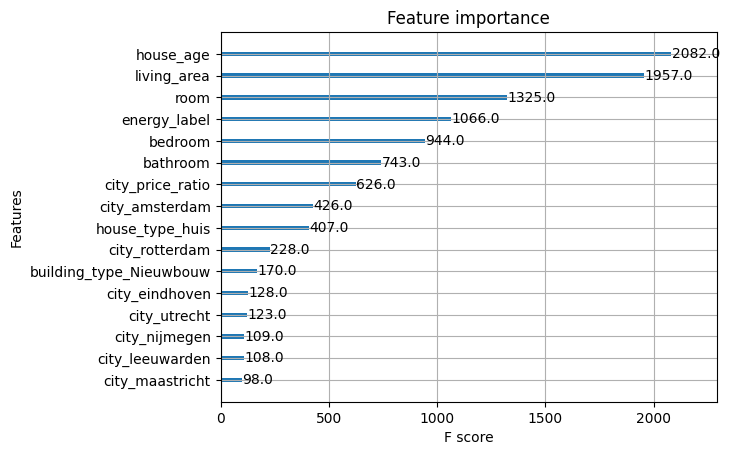

In [351]:
from xgboost import plot_importance
plot_importance(XGB_best)
plt.show()

In [350]:
r2_train = performance_metric(y1_train, XGB_best.predict(X_train))
r2_test = performance_metric(y1_test, XGB_best.predict(X_test))
print ("R2 train: ", r2_train)
print ("R2 test: ", r2_test)
''' 
plt.scatter(np.expm1(y1_train), np.expm1(gsXGB.predict(X_train)),label='R2:'+str(round(r2_train,4)))
plt.title('Train')
plt.xlabel('Price')
plt.ylabel('Price predicted')
plt.plot([100000,2000000], [100000,2000000], 'k-', alpha=0.75)
plt.legend()
plt.show()
plt.scatter(np.expm1(y1_test), y_hat_xgb,label='R2:'+str(round(r2_test,4)))
plt.plot([100000,2000000], [100000,2000000], 'k-', alpha=0.75)
plt.title('Test')
plt.xlabel('Price')
plt.ylabel('Price predicted')
plt.legend()
plt.show()
'''

R2 train:  0.9494281397910203
R2 test:  0.797459859060698


" \nplt.scatter(np.expm1(y1_train), np.expm1(gsXGB.predict(X_train)),label='R2:'+str(round(r2_train,4)))\nplt.title('Train')\nplt.xlabel('Price')\nplt.ylabel('Price predicted')\nplt.plot([100000,2000000], [100000,2000000], 'k-', alpha=0.75)\nplt.legend()\nplt.show()\nplt.scatter(np.expm1(y1_test), y_hat_xgb,label='R2:'+str(round(r2_test,4)))\nplt.plot([100000,2000000], [100000,2000000], 'k-', alpha=0.75)\nplt.title('Test')\nplt.xlabel('Price')\nplt.ylabel('Price predicted')\nplt.legend()\nplt.show()\n"

In [ ]:
# define param_grid:
param_grid = {
    'colsample_bytree': [0.3, 0.6, 0.9],
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [5, 7],
    'alpha': [10, 50, 100],
    'n_estimators': [50, 100, 150, 200]}
# Create XGBoost regressor
xg_reg_2 = xgb.XGBRegressor(objective ='reg:squarederror')

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=xg_reg_2, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3)
grid_search.fit(X, y)

# Train the model
xg_reg.fit(X_train_scaled_df, y1_train)

In [316]:
xg_reg.

<bound method RegressorMixin.score of XGBRegressor(alpha=10, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=10, n_jobs=None,
             num_parallel_tree=None, ...)>

In [200]:
df_all_drop.groupby(['city', 'on_market']).agg({'price':'mean'})

price
city       on_market               
almere     2023       427357.085690
           2024       514086.112459
amsterdam  2023       576122.464930
           2024       760475.679017
eindhoven  2023       461924.263722
           2024       578274.373250
leeuwarden 2023       301133.412951
           2024       394563.796526
maastricht 2023       379027.690789
           2024       525789.390728
nijmegen   2023       404248.396794
           2024       499116.293850
rotterdam  2023       414040.580000
           2024       536567.443327
utrecht    2023       481068.057410
           2024       588173.977683

# Filter data based on whether total room number = bedroom + bathroom

In [ ]:
# saving all houses which have unmatched room number as total of bedroom and bathroom
house_wrong_room_number = df_all_drop[(df_all_drop['bedroom'] + df_all_drop['bathroom'] ==  df_all_drop['room']) == False]

In [ ]:
# saving all houses which have unmatched room number as total of bedroom and bathroom
house_correct_room_number = df_all_drop[(df_all_drop['bedroom'] + df_all_drop['bathroom'] ==  df_all_drop['room']) == True]

In [ ]:
# total records of houses which has correct room number: 12747
house_correct_room_number.info()

In [ ]:
for col in house_correct_room_number.columns:
    print(house_correct_room_number[col].value_counts(dropna=False))
    print()

In [ ]:
house_correct_room_number[house_correct_room_number.living_area == 17]

In [ ]:
num = house_correct_room_number.select_dtypes(np.number)
row = int(np.ceil(len(num.columns)/2))
fig, ax = plt.subplots(row,2, figsize=(15, 20))
ax = ax.flatten()
ax
for i, col in enumerate(num.columns):
    sns.histplot(num[col], legend=col,  ax=ax[i])
    #ax[i]
#for col in num.columns:
plt.tight_layout()
plt.show()    
#    sns.histplot(num[col])

In [ ]:
num = house_correct_room_number.select_dtypes(np.number)
row = int(np.ceil(len(num.columns)/2))
fig, ax = plt.subplots(row,2, figsize=(15, 20))
ax = ax.flatten()
ax
for i, col in enumerate(num.columns):
    sns.boxplot(num[col],  ax=ax[i])
    #ax[i]
#for col in num.columns:
plt.tight_layout()
plt.show()    

In [ ]:
# categorical vars: 
# house_type: appartment, 
# building_type: Bestaande bouw, Nieuw bouw
# energy_label: A, B, C, D, E, F, G, >A+, na
# for cities, it is considered as an ordinal categorical var. I based on the average purchase price listed on CBS, the higher the price, the higher the ranking number. 
# therefore: ams:8, utrecht: 7, eindhoven: 6, nijmegen: 5, rot: 4, almere: 3, maas: 2, leeu: 1
ams_23.energy_label.value_counts(dropna=False)